# 1 - Importar dados

In [2]:
import pandas as pd

dados = pd.read_csv('Customer-Churn.csv')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


# 2 - Ajustando as variáveis

In [5]:
# modificação manual
traducao_dict = {
    'Sim': 1,
    'Nao': 0
}
dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dict)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
# modificação com get_dummies
dummie_data = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

# junção dos dados transformados com os que já tinhamos
dados_final = pd.concat([dados_modificados, dummie_data], axis=1)


In [7]:
dados_final.shape

(7043, 39)

In [8]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


In [9]:
# Dica para exibir todas as colunas
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


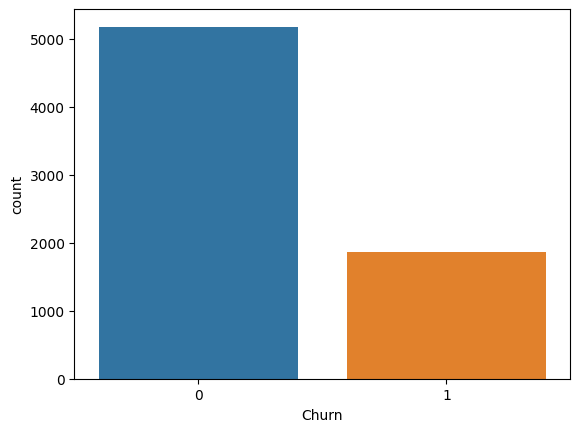

In [10]:
# Verificar balanceamento dos dados
import seaborn as sns

%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

A variavel churn está desbalanceada, visto que tem mais registros com valor zero.

Para corrigir isso pode ser feito um oversampling, que consiste em aumentar a quantidade de registros da classe 1.
Para isso vamos utilizar a classe SMOTE da biblioteca imbalanced-learn.

In [11]:
# Separar dados para aplicar SMOTE
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [12]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [13]:
dados_final = pd.concat([X, y], axis=1)  # concatena a variável target y com as features X
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


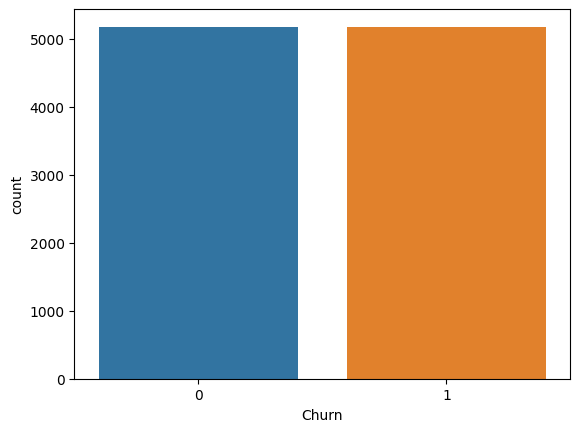

In [14]:
# agora a variável target possui a mesma quantidade de observações
ax = sns.countplot(x='Churn', data=dados_final)

## Utilizando o KNN k-nearest neighbors

In [15]:
# Dividir dados em inputs e outputs
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [16]:
# Biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [17]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.05443669,
        -0.54712618, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
         1.82773194, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
         1.82773194, -0.5315994 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05443669,
        -0.54712618, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
        -0.54712618, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
        -0.54712618, -0.5315994 ]])

In [18]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81514931, -0.41254225,
       -1.10768665, -1.32177005, -0.99594945,  3.06083934, -0.93540224,
        1.48315631, -1.05853285, -0.44850949,  0.77835396, -0.44850949,
       -0.59625062, -1.09729069, -0.44850949,  1.35149921,  0.91918014,
       -0.44850949, -0.73976267,  0.7857356 , -0.44850949, -0.60667885,
        1.08898545, -0.44850949, -0.84638695,  1.10631892, -0.44850949,
       -0.85770576, -0.4605816 ,  0.68807296, -0.47271247, -0.50820122,
        1.05443669, -0.54712618, -0.5315994 ])

In [19]:
# Amostra nova que queremos classificar qual será o churn
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [20]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81514931, -0.41254225,
        -1.14935017, -0.9723572 ,  1.00406703, -0.32670777, -0.93540224,
        -0.67423777,  0.94470379, -0.44850949,  0.77835396, -0.44850949,
        -0.59625062, -1.09729069, -0.44850949,  1.35149921,  0.91918014,
         2.22960721, -0.73976267, -1.27269275,  2.22960721, -0.60667885,
         1.08898545, -0.44850949, -0.84638695, -0.90389849, -0.44850949,
         1.16590099, -0.4605816 , -1.45333425,  2.11545084, -0.50820122,
        -0.94837368, -0.54712618,  1.88111576]])

## Distância euclidiana

In [21]:
import numpy as np
a = Xmaria_normalizado
b = X_normalizado[0]

In [22]:
# 1 - Subtração
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166352,  0.34941285,  2.00001647, -3.38754711,  0.        ,
        -2.15739408,  2.00323664,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.6781167 ,  0.        , -2.05842835,  2.6781167 ,  0.        ,
         0.        ,  0.        ,  0.        , -2.01021741,  0.        ,
         2.02360676,  0.        , -2.14140721,  2.58816332,  0.        ,
        -2.00281037,  0.        ,  2.41271515]])

In [23]:
# 2 - Realizar exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73584854e-03, 1.22089340e-01, 4.00006590e+00,
        1.14754754e+01, 0.00000000e+00, 4.65434920e+00, 4.01295706e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.17230906e+00, 0.00000000e+00, 4.23712727e+00, 7.17230906e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.04097403e+00, 0.00000000e+00, 4.09498430e+00, 0.00000000e+00,
        4.58562485e+00, 6.69858936e+00, 0.00000000e+00, 4.01124936e+00,
        0.00000000e+00, 5.82119441e+00]])

In [24]:
# 3 - somar
np.sum(np.square(a-b))

87.80230690890752

In [25]:
# 4 - tirar raiz quadrada da distância
np.sqrt(87.80230690890752)
# essa é a distância entre a maria e o cliente 0 da base de dados

9.370288517911684

## Implementar o modelo com k-neighbors classifier

In [26]:
# pacote de divisão dos dados
from sklearn.model_selection import train_test_split

In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

In [28]:
# pacote do modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# instanciar modelo, por padrão vai usar 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

In [30]:
# realizar treinamento do modelo
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [31]:
# realizar teste
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

### Exercicio: calcular distancia de Maria, dos 10 primeiros clientes da base de dados

In [32]:
import numpy as np
a = Xmaria_normalizado
b = X_normalizado[:10]

distancias = []

for i in b:
    distancias.append(np.sqrt(np.sum(np.square(a-i))))

distancias

[9.370288517911684,
 8.922447206427993,
 8.23391344608313,
 9.854534099083287,
 7.576054873296641,
 8.78042833080945,
 8.703456361758173,
 10.362544558363938,
 9.17580437654589,
 7.863989371198397]

### Treinamento e teste pelo modelo bernoulli naive bayes

In [33]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.94837368,
         1.82773194, -0.5315994 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.94837368,
         1.82773194, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05443669,
        -0.54712618, -0.5315994 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.94837368,
         1.82773194, -0.5315994 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.05443669,
        -0.54712618, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05443669,
        -0.54712618, -0.5315994 ]])

In [34]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [35]:
np.median(X_treino)

-0.44850949388572553

In [36]:
# importar classe do modelo
from sklearn.naive_bayes import BernoulliNB

# instanciar o modelo
# binarizar com base na mediana dos dados, valores acima do threshhold se transformam em 1 e abaixo em 0
bnb = BernoulliNB(binarize=0.44)

In [37]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=0.44)

In [38]:
predito_BNB = bnb.predict(X_teste)
predito_BNB

array([1, 0, 0, ..., 1, 1, 1])

### Implementar modelo de arvore de decisão

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [41]:
# importancia de cada atributo
dtc.feature_importances_

array([0.0181512 , 0.01497494, 0.00404973, 0.0206206 , 0.01551072,
       0.15455341, 0.20605364, 0.00861121, 0.00204014, 0.01497362,
       0.0059285 , 0.00160606, 0.        , 0.05357769, 0.        ,
       0.0165773 , 0.0107621 , 0.        , 0.00843441, 0.00804094,
       0.00043574, 0.01166525, 0.01582089, 0.        , 0.01396281,
       0.00692233, 0.        , 0.00414853, 0.00827523, 0.        ,
       0.01809795, 0.00893017, 0.23348935, 0.0280407 , 0.01590202,
       0.03529589, 0.01355288, 0.02099406])

In [42]:
predito_arvore_decisao = dtc.predict(X_teste)
predito_arvore_decisao

array([0, 0, 0, ..., 0, 1, 1])

### Técnicas para validar os modelos

* Matriz de confusão: Tabela com 2 linhas e 2 colunas que apresenta os números de falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

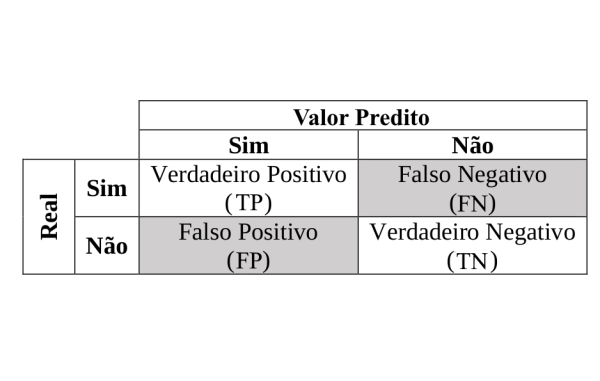

In [43]:
# usando matriz de confusão no python
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste, predito_knn))

[[1246  323]
 [ 262 1274]]


In [44]:
print(confusion_matrix(y_teste, predito_BNB))

[[1060  509]
 [ 209 1327]]


In [45]:
print(confusion_matrix(y_teste, predito_arvore_decisao))

[[1278  291]
 [ 274 1262]]


### Acuracia

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_teste, predito_knn))

0.8115942028985508


In [47]:
print(accuracy_score(y_teste, predito_BNB))

0.7687600644122383


In [48]:
print(accuracy_score(y_teste, predito_arvore_decisao))

0.8180354267310789


### Precisão

In [49]:
from sklearn.metrics import precision_score
print(precision_score(y_teste, predito_knn))

0.7977457733249843


In [50]:
print(precision_score(y_teste, predito_BNB))

0.7227668845315904


In [51]:
print(precision_score(y_teste, predito_arvore_decisao))

0.8126207340631036


### Recal

In [52]:
from sklearn.metrics import recall_score
print(recall_score(y_teste, predito_knn))

0.8294270833333334


In [53]:
print(recall_score(y_teste, predito_BNB))

0.8639322916666666


In [54]:
print(recall_score(y_teste, predito_arvore_decisao))

0.8216145833333334


### Escolhendo o melhor modelo

In [55]:
print('Knn: ', precision_score(y_teste, predito_knn))
print('Bernouli naive bayes: ', precision_score(y_teste, predito_BNB))
print('Decision Tree: ', precision_score(y_teste, predito_arvore_decisao))

Knn:  0.7977457733249843
Bernouli naive bayes:  0.7227668845315904
Decision Tree:  0.8126207340631036
